# ======================== Libaraies ======================

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# ======================= Functions =======================

In [2]:
def prediction(data,labels):
    labels_pred = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        sequence       = data[i].to(device)
        sequence_label = labels[i].unsqueeze(0).to(device)
        
        hidden = rnn.initHidden().to(device)
        output, hidden = rnn(sequence, hidden)
        
        labels_pred[i] = torch.argmax(output[-1]).cpu().numpy()
        
    acc = accuracy_score(labels, labels_pred)
    return labels_pred,acc

# =================== Parameters and input ===================

In [3]:
input_size  = 20
output_size = 2
hidden_size = 32
num_layers  = 4

Nb_epochs   = 10

train_data    = torch.rand(1000,10,1,input_size)
train_labels  = torch.randint(0, output_size, (1000,))

test_data     = torch.rand(1000,10,1,input_size)
test_labels   = torch.randint(0, output_size, (1000,))

learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

criterion = nn.NLLLoss()

# ===================== Creat RNN model =====================

- the architecture
![title](twornn.JPG)

In [4]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size,num_layers):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers  = num_layers

        self.rnn     = nn.RNN(input_size,hidden_size,num_layers,bidirectional=True)
        self.ho      = nn.Linear(hidden_size*2, output_size)
        self.softmax = nn.LogSoftmax(dim=2)

    def forward(self, S, hidden):
        
        output,hidden = self.rnn(S, hidden)
        
        output = self.ho(output)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(self.num_layers*2, 1,self.hidden_size)
    
rnn      = RNN(input_size, hidden_size, output_size,num_layers)

# =============== Run the model for one step of  ===================

In [5]:
hidden = torch.zeros(num_layers*2,1, hidden_size)
output, next_hidden = rnn(train_data[0], hidden)

# ===================== Train the network ========================

In [6]:
device    = torch.device("cuda" if torch.cuda.is_available() else "cpu")
rnn.to(device)
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)

train_acc = []
test_acc  = []
Loss      = np.zeros(Nb_epochs)
for i in range(Nb_epochs):
    rnn.train()
    L = 0
    for j in range(train_data.shape[0]):
        hidden         = rnn.initHidden().to(device)
        sequence       = train_data[j].to(device)
        sequence_label = train_labels[j].unsqueeze(0).to(device)
        output, hidden = rnn(sequence, hidden)
        loss           = criterion(output[-1], sequence_label)
        
        optimizer.zero_grad() # Clears existing gradients from previous epoch
        loss.backward() # Does backpropagation and calculates gradients
        optimizer.step() # Updates the weights accordingly
        
        L = L+loss.item()
    
    
    Loss[i] = L
    rnn.eval()
    
    _,train_acc1 = prediction(train_data,train_labels)
    _,test_acc1  = prediction(test_data,test_labels)
    train_acc.append(train_acc1)
    test_acc.append(test_acc1)
    print(i)

0
1
2
3
4
5
6
7
8
9


# ========================= Plot loss ==========================

Text(0.5, 1.0, 'RNN loss')

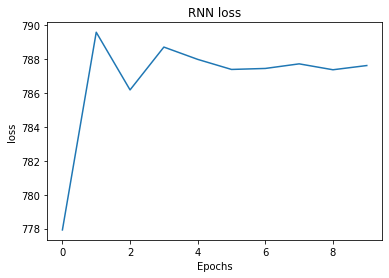

In [7]:
plt.plot(Loss)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('RNN loss')

Text(0.5, 1.0, 'RNN accuracy')

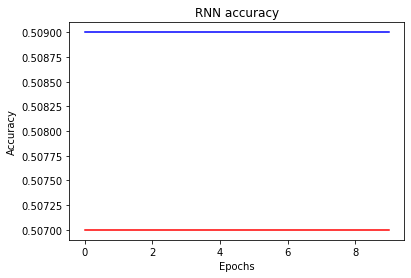

In [8]:
fig = plt.figure()
plt.plot(train_acc,label='Train acc',color='r')
plt.plot(test_acc,label='Test acc',color='b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('RNN accuracy')